In [5]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from database.connexion import get_connection

In [6]:
# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

1. Connexion à la base de données

In [ ]:
try:
    conn = get_connection()

    # 🔧 Forcer la conversion en str pour SQLAlchemy
    user = conn.user.decode() if isinstance(conn.user, bytes) else conn.user
    password = conn.password.decode() if isinstance(conn.password, bytes) else conn.password
    host = conn.host.decode() if isinstance(conn.host, bytes) else conn.host
    db = conn.db.decode() if isinstance(conn.db, bytes) else conn.db
    port = conn.port

    engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{db}")
    print("✅ Connexion réussie à la base de données MySQL via SQLAlchemy !")

except Exception as e:
    print(f"❌ Erreur de connexion à la base de données : {e}")
    raise SystemExit

✅ Connexion réussie à la base de données MySQL !
✅ Connexion réussie à la base de données MySQL via SQLAlchemy !


In [11]:
# === 2. Chargement des données ===
try:
    medals_df = pd.read_sql("SELECT * FROM medals", engine)
    print(f"✅ Données médailles chargées ({len(medals_df)} lignes)")
except Exception as e:
    print(f"❌ Erreur lors du chargement des données : {e}")
    raise SystemExit    

✅ Données médailles chargées (21697 lignes)


✅ Données Medals chargées depuis MySQL !
📊 Nombre total de médailles : 21697
   id discipline_title     slug_game    event_title event_gender medal_type  \
0   7          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
1   8          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
2   9          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
3  10          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
4  11          Curling  beijing-2022  Mixed Doubles        Mixed     BRONZE   
5  12          Curling  beijing-2022  Mixed Doubles        Mixed     BRONZE   
6  13          Curling  beijing-2022          Women        Women       GOLD   
7  14          Curling  beijing-2022          Women        Women     SILVER   
8  15          Curling  beijing-2022          Women        Women     BRONZE   
9  16          Curling  beijing-2022            Men          Men       GOLD   

  participant_type participant_title  \
0         Gam

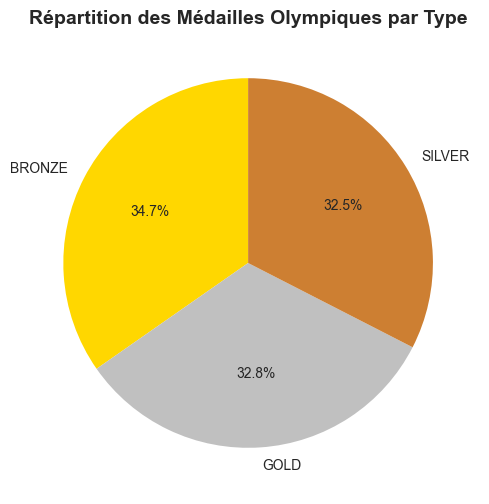

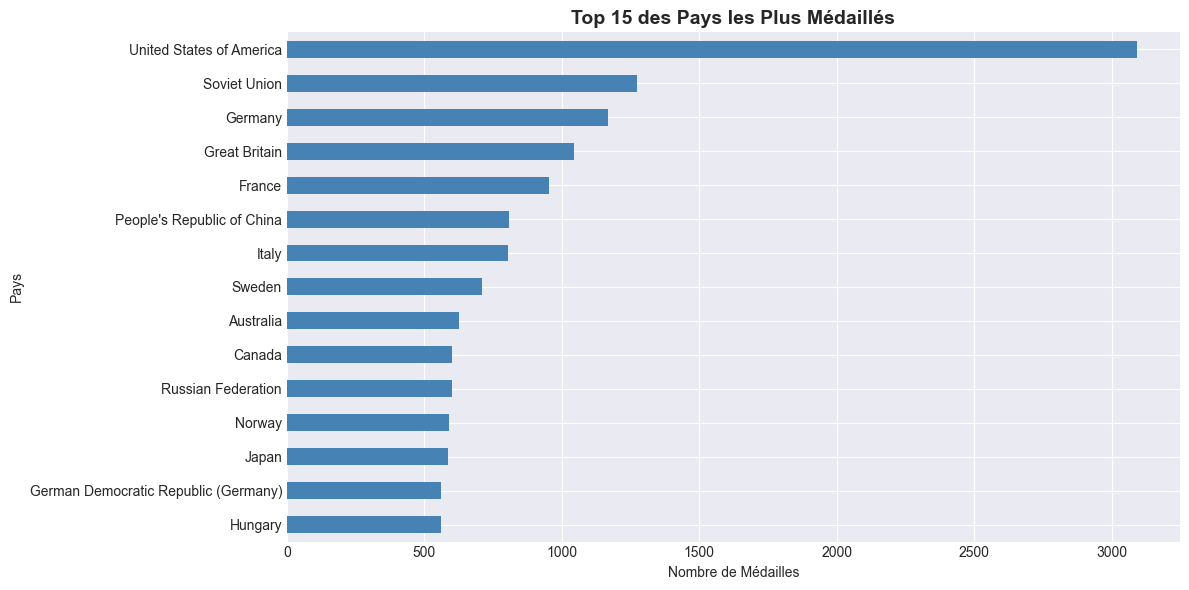

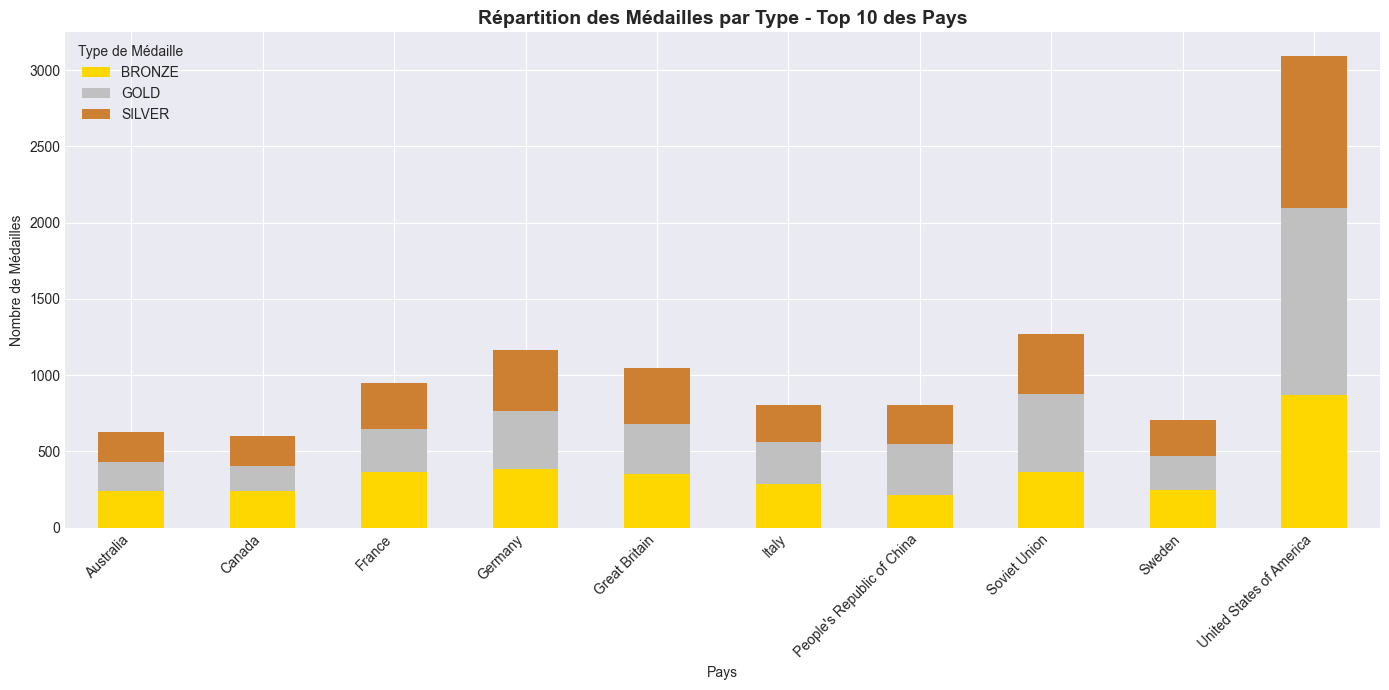

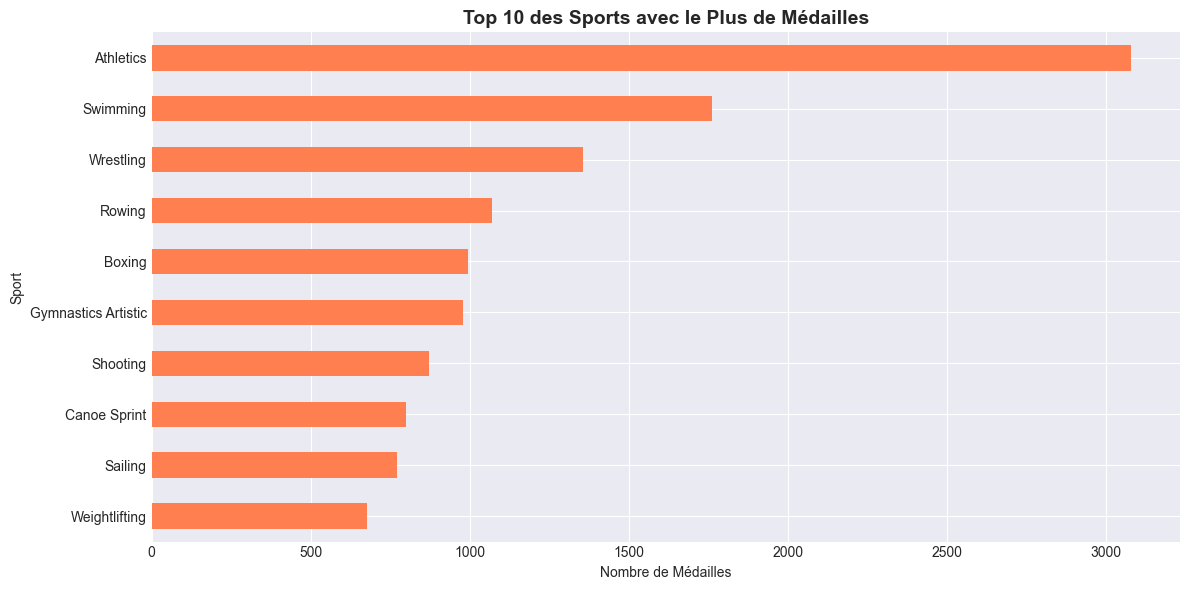


🇫🇷 France - Total des médailles : 952

📊 Répartition par type :
medal_type
BRONZE    365
SILVER    305
GOLD      282
Name: count, dtype: int64

🏆 Top 5 des sports où la France excelle :
discipline_title
Fencing          123
Cycling Track     74
Athletics         70
Sailing           61
Judo              57
Name: count, dtype: int64


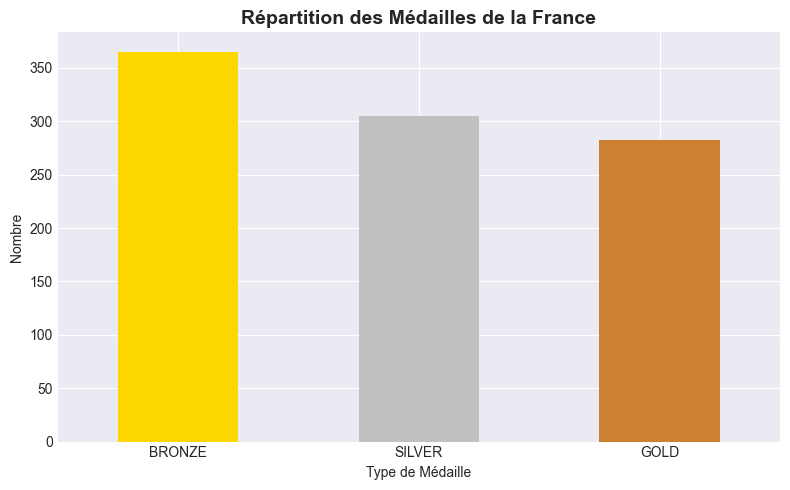

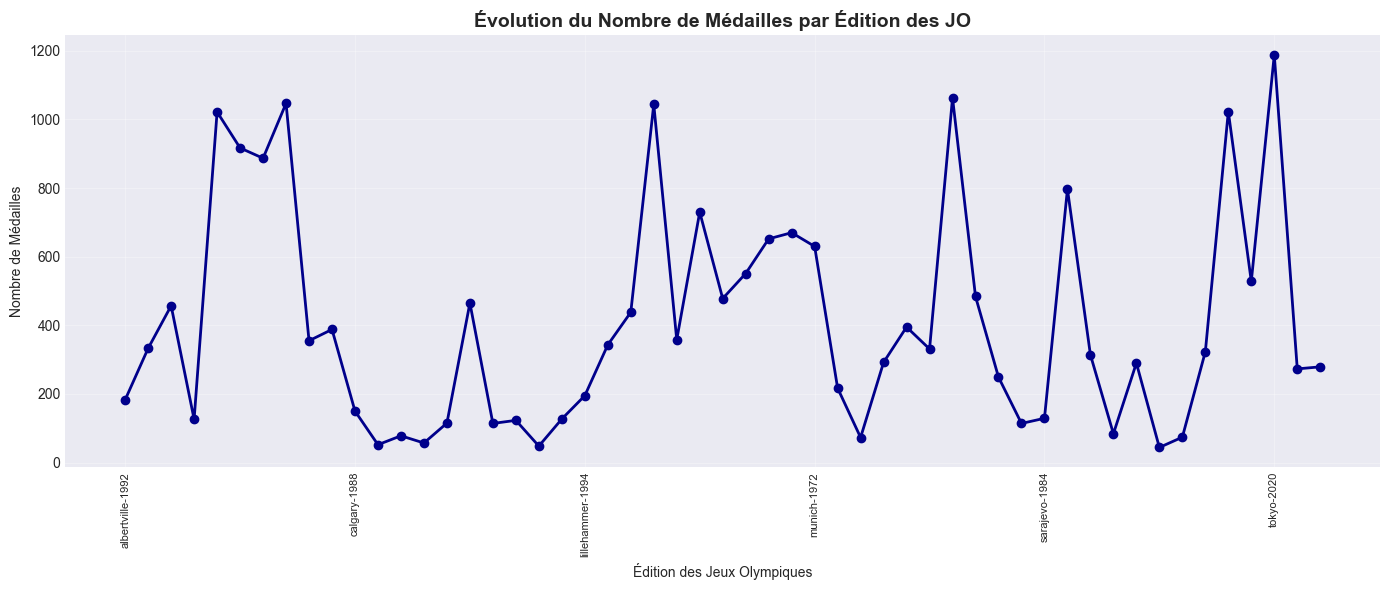


📊 Répartition par type de participant :
participant_type
Athlete     15113
GameTeam     6584
Name: count, dtype: int64


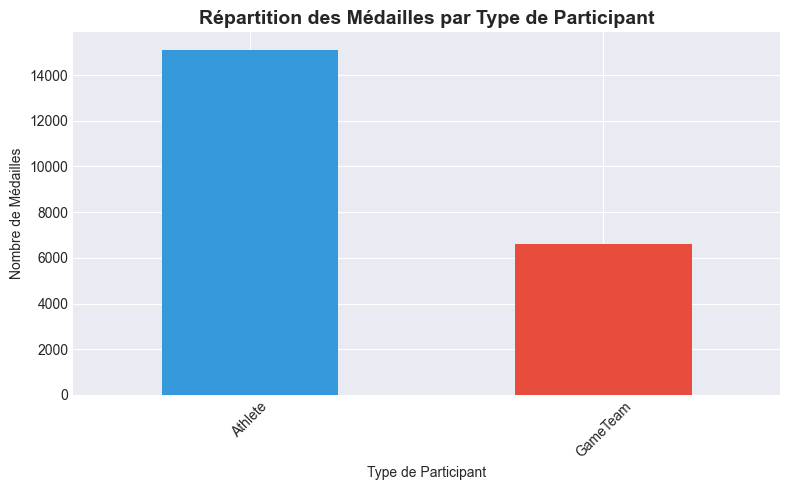


           🏅 RÉSUMÉ DE L'ANALYSE DES MÉDAILLES 🏅

📊 Total de médailles analysées : 21,697
🌍 Nombre de pays médaillés : 154
🏃 Nombre de sports : 86
🎯 Éditions olympiques : 53

🏆 Top 3 des pays :
   1. United States of America : 3094 médailles
   2. Soviet Union : 1272 médailles
   3. Germany : 1167 médailles

🏃 Top 3 des sports :
   1. Athletics : 3080 médailles
   2. Swimming : 1763 médailles
   3. Wrestling : 1356 médailles

🇫🇷 France :
   - Total : 952 médailles
   - Classement mondial : 5



In [12]:
# Lecture de la table "medals"
print("✅ Données Medals chargées depuis MySQL !")
print(f"📊 Nombre total de médailles : {len(medals_df)}")
print(medals_df.head(10))
print("\n" + "="*50)
print(medals_df.info())

# ============================================================
# 📊 ANALYSE DESCRIPTIVE DES MÉDAILLES
# ============================================================
print("\n" + "="*60)
print("📈 Répartition par type de médaille :")
print(medals_df["medal_type"].value_counts())

print("\n🌍 Nombre de pays ayant remporté au moins une médaille :")
print(medals_df["country_name"].nunique())

print("\n🏃 Nombre de sports olympiques :")
print(medals_df["discipline_title"].nunique())

print("\n📅 Période couverte :")
print(f"De {medals_df['slug_game'].min()} à {medals_df['slug_game'].max()}")

print("\n🏆 Top 5 des pays les plus médaillés :")
print(medals_df["country_name"].value_counts().head(5))

# ============================================================
# 📊 VISUALISATION 1 : Répartition des types de médailles
# ============================================================
plt.figure(figsize=(8, 6))
medal_counts = medals_df["medal_type"].value_counts()
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Or, Argent, Bronze
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title("Répartition des Médailles Olympiques par Type", fontsize=14, fontweight='bold')
plt.show()

# ============================================================
# 🏆 VISUALISATION 2 : Top 15 des pays les plus médaillés
# ============================================================
plt.figure(figsize=(12, 6))
top_countries = medals_df["country_name"].value_counts().head(15)
top_countries.plot(kind="barh", color="steelblue")
plt.title("Top 15 des Pays les Plus Médaillés", fontsize=14, fontweight='bold')
plt.xlabel("Nombre de Médailles")
plt.ylabel("Pays")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ============================================================
# 🥇🥈🥉 VISUALISATION 3 : Médailles par type pour le Top 10
# ============================================================
# Préparation des données
top_10_countries = medals_df["country_name"].value_counts().head(10).index
medals_top_10 = medals_df[medals_df["country_name"].isin(top_10_countries)]

# Pivot table
pivot_data = medals_top_10.pivot_table(
    index="country_name", 
    columns="medal_type", 
    aggfunc="size", 
    fill_value=0
)

# Graphique empilé
pivot_data.plot(kind="bar", stacked=True, figsize=(14, 7), 
                color=['#FFD700', '#C0C0C0', '#CD7F32'])
plt.title("Répartition des Médailles par Type - Top 10 des Pays", fontsize=14, fontweight='bold')
plt.xlabel("Pays")
plt.ylabel("Nombre de Médailles")
plt.legend(title="Type de Médaille")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ============================================================
# 🏃‍♂️ VISUALISATION 4 : Top 10 des sports les plus médaillés
# ============================================================
plt.figure(figsize=(12, 6))
top_sports = medals_df["discipline_title"].value_counts().head(10)
top_sports.plot(kind="barh", color="coral")
plt.title("Top 10 des Sports avec le Plus de Médailles", fontsize=14, fontweight='bold')
plt.xlabel("Nombre de Médailles")
plt.ylabel("Sport")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ============================================================
# 🇫🇷 ANALYSE SPÉCIFIQUE : Performance de la France
# ============================================================
# Filtrer les médailles de la France
france_medals = medals_df[medals_df["country_name"] == "France"]

print("\n" + "="*60)
print(f"🇫🇷 France - Total des médailles : {len(france_medals)}")
print("\n📊 Répartition par type :")
print(france_medals["medal_type"].value_counts())

print("\n🏆 Top 5 des sports où la France excelle :")
print(france_medals["discipline_title"].value_counts().head(5))

# Graphique des médailles françaises par type
plt.figure(figsize=(8, 5))
france_medals["medal_type"].value_counts().plot(kind="bar", 
                                                  color=['#FFD700', '#C0C0C0', '#CD7F32'])
plt.title("Répartition des Médailles de la France", fontsize=14, fontweight='bold')
plt.xlabel("Type de Médaille")
plt.ylabel("Nombre")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================
# 📈 VISUALISATION 5 : Évolution temporelle des médailles
# ============================================================
# Compter les médailles par édition (slug_game)
medals_by_game = medals_df["slug_game"].value_counts().sort_index()

plt.figure(figsize=(14, 6))
medals_by_game.plot(kind="line", marker="o", color="darkblue", linewidth=2)
plt.title("Évolution du Nombre de Médailles par Édition des JO", fontsize=14, fontweight='bold')
plt.xlabel("Édition des Jeux Olympiques")
plt.ylabel("Nombre de Médailles")
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 🌍 ANALYSE PAR TYPE DE PARTICIPANT
# ============================================================
# Vérifier si la colonne participant_type existe
if "participant_type" in medals_df.columns:
    print("\n" + "="*60)
    print("📊 Répartition par type de participant :")
    print(medals_df["participant_type"].value_counts())
    
    plt.figure(figsize=(8, 5))
    medals_df["participant_type"].value_counts().plot(kind="bar", color=["#3498db", "#e74c3c", "#95a5a6"])
    plt.title("Répartition des Médailles par Type de Participant", fontsize=14, fontweight='bold')
    plt.xlabel("Type de Participant")
    plt.ylabel("Nombre de Médailles")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ La colonne 'participant_type' n'existe pas dans la base de données")

# ============================================================
# 🎯 CONCLUSION ET RÉSUMÉ FINAL
# ============================================================
print("\n" + "=" * 60)
print("           🏅 RÉSUMÉ DE L'ANALYSE DES MÉDAILLES 🏅")
print("=" * 60)

print(f"\n📊 Total de médailles analysées : {len(medals_df):,}")
print(f"🌍 Nombre de pays médaillés : {medals_df['country_name'].nunique()}")
print(f"🏃 Nombre de sports : {medals_df['discipline_title'].nunique()}")
print(f"🎯 Éditions olympiques : {medals_df['slug_game'].nunique()}")

print("\n🏆 Top 3 des pays :")
for i, (country, count) in enumerate(medals_df["country_name"].value_counts().head(3).items(), 1):
    print(f"   {i}. {country} : {count} médailles")

print("\n🏃 Top 3 des sports :")
for i, (sport, count) in enumerate(medals_df["discipline_title"].value_counts().head(3).items(), 1):
    print(f"   {i}. {sport} : {count} médailles")

print("\n🇫🇷 France :")
france_count = len(medals_df[medals_df["country_name"] == "France"])
france_rank = list(medals_df["country_name"].value_counts().index).index("France") + 1 if "France" in medals_df["country_name"].values else "N/A"
print(f"   - Total : {france_count} médailles")
print(f"   - Classement mondial : {france_rank}")

print("\n" + "=" * 60)